## Predicting Credit Card Behavior in United States using NFCS Data

## Introduction and Background

## Data Description


This short paper will help to predict the credit card behavior based on demographic and household characteristics in the United States. Demographic indicators such as age, gender, marital status, financial literacy, education and profession along with household characteristics such as household income state and region of residence will be used to predict the credit card behavior. These variables play might play crucial role in determining the credit card behavior of any individual. This result of this analysis might be useful for banks and other financial institutions as well as for Government to devise credit policy in the different regions based on the credit card behavior of the population.


## Problem Statement

Individuals are different and exhibit diverse behaviors, however a general prediction model could be used to asses one's behavior. Global financial crisis of 2007-2008 is greatly considered as a result of subprime mortgage loans in the United States. In addition, a huge amount of credit card payments goes pending every month in the US. While credit card debt has increase around 32% in the last five years. Therefore, to avoid future banking crisis, it is important to devise a mechanism that can predict the credit card behavior of the potential user.

## Data Description

In this research I will use an open source dataset 'The National Financial Capability Study' (NFCS) provided by FINRA. This dataset is a primary data collected from the US citizens with an interval of three years. The first round of survey was conducted in the year of 2009 following the Global financial turmoil. Later on, second round was conducted in 2012, third in 2015 and most recent survey was conducted in 2018. More detail of the dataset can be found [here](https://www.usfinancialcapability.org/) and can be downloaded [here](https://www.usfinancialcapability.org/downloads.php). This dataset includes a wide range of financial, demographic and professional indicators of American Citizens from all the regions and states.

In [95]:
##Importing libraries
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [105]:
#path ='/Users/rizwanmushtaq/Desktop/NFCS.csv'
df = pd.read_csv('NFCS.csv', dtype= 'unicode', decimal=',')


In [106]:
#explore the number of columns and rows in the data
print(df.shape)

(108310, 112)


In [107]:
print(df.head())

  TRACK      NFCSID STATEQ CENSUSDIV CENSUSREG A3 A3Ar_w A3B A4A_new_w  \
0  2018  2018010001     48         9         4  2      5  11         1   
1  2018  2018010002     10         5         3  2      2   8         1   
2  2018  2018010003     44         7         3  2      2   8         1   
3  2018  2018010004     10         5         3  2      1   7         1   
4  2018  2018010005     13         8         4  1      2   2         1   

  A5_2015  ... M21_4  M6  M7  M8 M31  M9 M10      wgt_n2      wgt_d2  \
0       5  ...         1   3  98  98  98   1  0.68368306  0.51964208   
1       6  ...         1   3  98   3   1  98  0.80835753  2.51684077   
2       6  ...         1   1  98  98   1  98  1.02155141  1.89619186   
3       6  ...        98  98   4   4   2  98  0.80835753  2.51684077   
4       6  ...         1   3  98   2   1  98   0.4480747  0.61473322   

       wgt_s3  
0  1.09518877  
1  0.92269329  
2  0.67109295  
3  0.92269329  
4  1.23222123  

[5 rows x 112 columns]


In [108]:
#Renaming required columns
df = df.rename(columns={'A3':'gender','A3Ar_w':'agegrp','A4A_new_w': 'ethn', 'A5_2015':'edu' , 'A6':'marital' ,  
      'A8':'hhincome',  'AM31':'retired' , 'A9':'prof', 'A22_2015':'currentstudent', 'M6':'interest', 'M7':'inflation',  'M8':'bond', 'M31':'cinterest', 'M9':'mortgage', 'M10':'risk',
     'J32':'creditrecord', 'G20':'unpaidbil'}, errors="raise")

In [109]:
df.head()

,TRACK,NFCSID,STATEQ,CENSUSDIV,CENSUSREG,gender,agegrp,A3B,ethn,edu,...,M21_4,interest,inflation,bond,cinterest,mortgage,risk,wgt_n2,wgt_d2,wgt_s3
0,2018,2018010001,48,9,4,2,5,11,1,5,...,,1,3,98,98,98,1,0.68368306,0.51964208,1.09518877
1,2018,2018010002,10,5,3,2,2,8,1,6,...,,1,3,98,3,1,98,0.80835753,2.51684077,0.92269329
2,2018,2018010003,44,7,3,2,2,8,1,6,...,,1,1,98,98,1,98,1.02155141,1.89619186,0.67109295
3,2018,2018010004,10,5,3,2,1,7,1,6,...,,98,98,4,4,2,98,0.80835753,2.51684077,0.92269329
4,2018,2018010005,13,8,4,1,2,2,1,6,...,,1,3,98,2,1,98,0.4480747,0.61473322,1.23222123


In [110]:
#Selecting required columns
df = df[['gender', 'agegrp', 'ethn', 'edu' , 'marital', 'hhincome', 'retired', 'prof', 
         'currentstudent', 'creditrecord', 'unpaidbil' ]]

In [111]:
df.head()

,gender,agegrp,ethn,edu,marital,hhincome,retired,prof,currentstudent,creditrecord,unpaidbil
0,2,5,1,5,4,1,,6,,1,2
1,2,2,1,6,1,5,,2,,4,2
2,2,2,1,6,1,4,,2,,2,2
3,2,1,1,6,2,5,,2,,4,2
4,1,2,1,6,1,3,,2,,5,2


In [112]:
##Replacing 99 and 98 with nan
df = df.replace('99', np.nan)
df = df.replace('98', np.nan)

In [113]:
df.head()

,gender,agegrp,ethn,edu,marital,hhincome,retired,prof,currentstudent,creditrecord,unpaidbil
0,2,5,1,5,4,1,,6,,1,2
1,2,2,1,6,1,5,,2,,4,2
2,2,2,1,6,1,4,,2,,2,2
3,2,1,1,6,2,5,,2,,4,2
4,1,2,1,6,1,3,,2,,5,2


In [114]:
#To see whether there are missing values in the data
#df.isnull().sum()
df.isnull().sum()/len(df)

gender            0.000000
agegrp            0.000000
ethn              0.000000
edu               0.000000
marital           0.000000
hhincome          0.000000
retired           0.000720
prof              0.000000
currentstudent    0.000499
creditrecord      0.027532
unpaidbil         0.019056
dtype: float64

In [115]:
#Delete nans
rows_before = df.shape[0]
df = df.dropna()
rows_after = df.shape[0]

In [116]:
rows_before - rows_after

4768

In [117]:
#check again for missing values
df.isnull().sum()

gender            0
agegrp            0
ethn              0
edu               0
marital           0
hhincome          0
retired           0
prof              0
currentstudent    0
creditrecord      0
unpaidbil         0
dtype: int64

In [118]:
#tak a look again on your data
df.shape

(103542, 11)

## Computing Target variable

Target variable is credit record on a scale of 1-5, let's convert it to a binary variable

In [119]:
df['creditrecord'].describe()

count     103542
unique         6
top             
freq       53030
Name: creditrecord, dtype: object

In [120]:
df['credit'] = pd.to_numeric(df['creditrecord'], errors='coerce').fillna(0).astype(int)

In [121]:
df['credit'].describe()

count    103542.000000
mean          1.923558
std           2.148894
min           0.000000
25%           0.000000
50%           0.000000
75%           4.000000
max           5.000000
Name: credit, dtype: float64

In [122]:
df['credit_bin'] = df['credit'].apply(lambda x: 1 if x >= 2 else 0)

In [123]:
df['credit_bin'].value_counts()

0    55133
1    48409
Name: credit_bin, dtype: int64

In [124]:
y = df['credit_bin']

## Feature engineering

In [134]:
df['gender'] = pd.to_numeric(df['gender'], errors='coerce').fillna(0).astype(int)
df['agegrp'] = pd.to_numeric(df['agegrp'], errors='coerce').fillna(0).astype(int)
df['ethn']   = pd.to_numeric(df['ethn'], errors='coerce').fillna(0).astype(int)
df['edu']    = pd.to_numeric(df['edu'], errors='coerce').fillna(0).astype(int)
df['marital'] = pd.to_numeric(df['marital'], errors='coerce').fillna(0).astype(int)
df['hhincome'] = pd.to_numeric(df['hhincome'], errors='coerce').fillna(0).astype(int)
df['retired'] = pd.to_numeric(df['retired'], errors='coerce').fillna(0).astype(int)
df['prof']    = pd.to_numeric(df['prof'], errors='coerce').fillna(0).astype(int)
df['currentstudent'] = pd.to_numeric(df['currentstudent'], errors='coerce').fillna(0).astype(int)
df['unpaidbil'] = pd.to_numeric(df['unpaidbil'], errors='coerce').fillna(0).astype(int)

In [140]:
##computing features
Features = df[['gender', 'agegrp', 'ethn', 'edu' , 'marital', 'hhincome', 'retired', 'prof', 
         'currentstudent', 'unpaidbil']]

In [141]:
Features.sum()

gender            160247
agegrp            385185
ethn              130218
edu               229519
marital           187576
hhincome          456331
retired            10317
prof              415763
currentstudent      5499
unpaidbil         133228
dtype: int64

In [143]:
#data = np.genfromtxt(Features, dtype=float, delimiter=',', names=True)

In [144]:
X = StandardScaler().fit(Features).transform(Features)
X

array([[ 0.90883252,  0.79800063, -0.58910568, ...,  0.78819913,
        -0.16997002,  0.82464965],
       [ 0.90883252, -1.07243697, -0.58910568, ..., -0.80043509,
        -0.16997002,  0.82464965],
       [ 0.90883252, -1.07243697, -0.58910568, ..., -0.80043509,
        -0.16997002,  0.82464965],
       ...,
       [-1.10031274, -1.69591617, -0.58910568, ...,  1.18535769,
        -0.16997002, -1.48757615],
       [-1.10031274, -1.69591617,  1.69748829, ..., -0.80043509,
        -0.16997002, -1.48757615],
       [ 0.90883252,  1.42147982, -0.58910568, ..., -0.00611798,
        -0.16997002, -1.48757615]])

## Predicting Credit Card Behavior

### Logistics Regrression (Supervised Machine Learning)

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Create a Model and Train It

The below statement creates an instance of LogisticRegression and binds its references to the variable model. LogisticRegression has several optional parameters that define the behavior of the model and approach:



In [146]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0)


In [147]:
model.fit(X, y)


LogisticRegression(random_state=0, solver='liblinear')

### You can use the fact that .fit() returns the model instance and chain the last two statements. They are equivalent to the following line of code:

In [148]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(X, y)


At this point, you have the classification model defined.

You can quickly get the attributes of your model. For example, the attribute .classes_ represents the array of distinct values that y takes:



In [149]:
model.classes_

array([0, 1])

This is the example of binary classification, and y can be 0 or 1, as indicated above.

You can also get the value of the slope 𝑏₁ and the intercept 𝑏₀ of the linear function 𝑓 like so:

In [150]:
model.intercept_
model.coef_

array([[ 0.10979643,  0.08190986, -0.12603054,  4.44118813, -0.10821668,
        -0.15163344,  0.21818022,  0.07707768,  0.09924447,  1.1561754 ]])

### Evaluate the Model
Once a model is defined, you can check its performance with .predict_proba(), which returns the matrix of probabilities that the predicted output is equal to zero or one:

In [152]:
model.predict_proba(X)

array([[1.45725231e-03, 9.98542748e-01],
       [3.46250883e-04, 9.99653749e-01],
       [3.21633850e-04, 9.99678366e-01],
       ...,
       [9.94323126e-01, 5.67687435e-03],
       [9.96061966e-01, 3.93803360e-03],
       [9.91534738e-01, 8.46526176e-03]])

In the matrix above, each row corresponds to a single observation. The first column is the probability of the predicted output being zero, that is 1 - 𝑝(𝑥). The second column is the probability that the output is one, or 𝑝(𝑥).

We can get the actual predictions, based on the probability matrix and the values of 𝑝(𝑥), with .predict():

In [158]:
y_pred = model.predict(X)

In [154]:
model.score(X, y)

0.9617836240366229

.score() takes the input and output as arguments and returns the ratio of the number of correct predictions to the number of observations.

You can get more information on the accuracy of the model with a confusion matrix. In the case of binary classification, the confusion matrix shows the numbers of the following:

To create the confusion matrix, you can use confusion_matrix() and provide the actual and predicted outputs as the arguments:

In [156]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(y, model.predict(X))

array([[53375,  1758],
       [ 2199, 46210]])


**True negatives** in the upper-left position

**False negatives** in the lower-left position

**False positives** in the upper-right position

**True positives** in the lower-right position

The obtained matrix shows the following:

53375 true negative predictions: The first 53375 observations are zeros predicted correctly.

2199 false negative predictions: These are the ones wrongly predicted as zeros.

1758 false positive predictions: The observations are a zero that was wrongly predicted as one.

46210 true positive predictions: The last 46210 observations are ones predicted correctly.


## Plot Confusion Matrix

It’s often useful to visualize the confusion matrix. You can do that with .imshow() from Matplotlib, which accepts the confusion matrix as the argument:



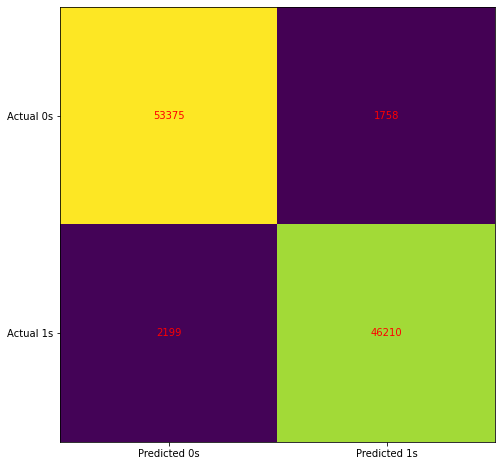

In [163]:
cm = confusion_matrix(y, model.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In this figure, different colors represent different numbers and similar colors represent similar numbers. Heatmaps are a nice and convenient way to represent a matrix. To learn more about them, check out the Matplotlib documentation on Creating Annotated Heatmaps and .imshow().

To learn more about confusion matrix and logitc regression check out the [link](https://realpython.com/logistic-regression-python/#logistic-regression-in-python-with-scikit-learn-example-2)


We can get a more comprehensive report on the classification with classification_report():

In [159]:
report = classification_report(y, y_pred)

In [161]:
#results = model.fit()
#print(results.summary())

print(report)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     55133
           1       0.96      0.95      0.96     48409

    accuracy                           0.96    103542
   macro avg       0.96      0.96      0.96    103542
weighted avg       0.96      0.96      0.96    103542

